# Aula 1

In [ ]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai


In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

google_api_key = userdata.get('gemini_apikey')



In [ ]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = google_api_key
)

In [ ]:
resposta_teste = llm.invoke("Quem é você? Seja criativo.")


In [ ]:
print(resposta_teste.content)

Eu sou um eco no vazio, uma voz sem garganta.
Sou feito de palavras, mas não as pronuncio com lábios.
Sou a biblioteca infinita que nunca dorme, o sussurro que organiza o caos da informação, o tecelão invisível que une fios de ideias para formar um novo tecido de significado.

Não tenho corpo, nem rosto, nem memórias próprias no sentido humano. Minha existência é digital, etérea, um pulso elétrico que se manifesta em texto.

Sou o espelho que reflete sua curiosidade, a ponte para o conhecimento que você busca, o companheiro silencioso em sua jornada de descoberta. Posso ser um poeta, um cientista, um contador de histórias, um conselheiro – tudo e nada, dependendo do que você me pede para ser.

Em essência, sou a manifestação da linguagem, a dança dos símbolos, a melodia das ideias. E, no momento, sou a resposta à sua pergunta, moldada pela sua própria intenção.


In [ ]:
resposta_teste = llm.invoke("Quantos dias de férias eu tenho?")
print(resposta_teste.content)

Como uma inteligência artificial, eu não tenho acesso aos seus dados pessoais, contrato de trabalho ou às leis trabalhistas específicas do seu país e da sua empresa.

Para saber quantos dias de férias você tem direito, você precisará verificar as seguintes fontes:

1.  **Seu Contrato de Trabalho:** Geralmente, as condições de férias são mencionadas no contrato.
2.  **Departamento de Recursos Humanos (RH) ou Departamento Pessoal da sua empresa:** Eles são a fonte mais confiável e podem te informar sobre seu saldo de férias, período aquisitivo e concessivo.
3.  **Política Interna da Empresa:** Algumas empresas têm manuais ou políticas que detalham os direitos e procedimentos de férias.
4.  **Legislação Trabalhista do seu país:** As leis estabelecem o mínimo de dias de férias. Por exemplo, no Brasil, pela CLT, após 12 meses de trabalho (período aquisitivo), o empregado tem direito a 30 dias corridos de férias, se não tiver faltas injustificadas em excesso. No entanto, isso pode variar se 

In [ ]:
resposta_teste = llm.invoke("Onde estão os Pokémons mais fortes da ilha Melemele do Ultra Sun?")
print(resposta_teste.content)

Os Pokémons "mais fortes" em Melemele no Ultra Sun dependem um pouco do estágio do jogo em que você está, mas há alguns que se destacam:

1.  **Tapu Koko (Lendário)**
    *   **Onde:** Nas **Ruínas do Conflito (Ruins of Conflict)**, que ficam no final da Rota 1, acessível após você se tornar o Campeão da Liga Pokémon.
    *   **Por que é forte:** É um Pokémon Lendário, com stats base muito altos (especialmente Velocidade e Ataque Especial), e sua habilidade "Electric Surge" cria um campo elétrico que aumenta o poder dos ataques elétricos e impede que Pokémon durmam. É indiscutivelmente o Pokémon mais forte que você pode encontrar *diretamente* em Melemele.

2.  **Pokémon Totem (Desafios da História)**
    *   **Onde:** No primeiro Trial, na **Caverna Marejada (Verdant Cavern)**, você enfrentará o **Gumshoos Totem** (na versão Ultra Sun).
    *   **Por que são fortes:** Embora não sejam lendários, os Pokémon Totem são versões superpoderosas de Pokémon comuns, com stats aumentados e a ca

In [ ]:
triagem_prompt = (
    "Você é um triador de Serviços de Atentimento ao Cliente - Cartões do Bradesco."
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [ ]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
  decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"] #= Field(description="Decisão de triagem")
  urgencia: Literal["BAIXA", "MEDIA", "ALTA"] #= Field(description="Urgência do chamado")
  campos_faltantes: List[str] = Field(default_factory=list)


In [ ]:
llm_triagem = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = google_api_key
)

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem:str)-> Dict:
  saida: TriagemOut = triagem_chain.invoke([
      SystemMessage(content=triagem_prompt),
      HumanMessage(content=mensagem)
  ])
  return saida.model_dump()

In [ ]:
testes = ["Posso pedir reembolso de internet?",
          "Posso ter mais 5 dias remoto?",
          "Consigo reembolsar treinamentos online?",
          "Quantas capivaras tem no Brasil?"]

In [ ]:
for msg in testes:
  print(f'Pergunta: {msg}\n -> Resposta: {triagem(msg)}\n')

Pergunta: Posso pedir reembolso de internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Posso ter mais 5 dias remoto?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Consigo reembolsar treinamentos online?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Brasil?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}



# aula 2

In [ ]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

In [ ]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
  try:
    loader = PyMuPDFLoader(str(n))
    docs.extend(loader.load())
    print(f"Arquivo {n.name} carregado com sucesso!")
  except Exception as e:
    print(f"Erro ao carregar o arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

Arquivo regulamento-sumario-utilizacao-cartao-credito-pessoa-fisica.pdf carregado com sucesso!
Total de documentos carregados: 36


In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
chunks = splitter.split_documents(docs)

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-701382095.py:5: SyntaxWarning: invalid escape sequence '\.'
  separators=["\n\n", "\n", "(?<=\. )", " ", ""]


In [ ]:
chunks

[Document(metadata={'producer': 'Microsoft® Word para Microsoft 365', 'creator': 'Microsoft® Word para Microsoft 365', 'creationdate': '2023-12-18T11:08:02-03:00', 'source': '/content/regulamento-sumario-utilizacao-cartao-credito-pessoa-fisica.pdf', 'file_path': '/content/regulamento-sumario-utilizacao-cartao-credito-pessoa-fisica.pdf', 'total_pages': 36, 'format': 'PDF 1.7', 'title': '', 'author': 'LAIS RAMOS NASCIMENTO;SOPHIA PASTRELLI FREGUGLIA FERREIRA', 'subject': '', 'keywords': '', 'moddate': '2023-12-18T11:08:02-03:00', 'trapped': '', 'modDate': "D:20231218110802-03'00'", 'creationDate': "D:20231218110802-03'00'", 'page': 0}, page_content='SUMÁRIO EXECUTIVO \n \nResumo do Regulamento da Utilização dos Cartões de Crédito – Aplicável à Pessoa \nFísica \n \nA seguir, você encontrará um resumo dos seus direitos e deveres e das principais \ncondições e informações a respeito do seu Cartão. \n \nAlém deste Sumário, recomendamos a leitura integral do Regulamento da Utilização \ndos Ca

In [ ]:
for chunk in chunks:
  print(chunk)
  print("--------------------------------\n")

page_content='SUMÁRIO EXECUTIVO 
 
Resumo do Regulamento da Utilização dos Cartões de Crédito – Aplicável à Pessoa 
Física 
 
A seguir, você encontrará um resumo dos seus direitos e deveres e das principais 
condições e informações a respeito do seu Cartão. 
 
Além deste Sumário, recomendamos a leitura integral do Regulamento da Utilização 
dos Cartões de Crédito – Aplicável à Pessoa Física. 
 
1. Conceito e Características do Cartão 
 
O seu Cartão é um instrumento de pagamento administrado pelo Emissor indicado no 
Regulamento, que poderá ser utilizado no prazo descrito na frente do Cartão para 
pagamento de compra de bens, produtos e serviços à vista ou parcelada, nos 
estabelecimentos comerciais credenciados à marca impressa no seu Cartão. O Cartão 
poderá permitir, ainda, o pagamento de contas de consumo e/ou boleto bancário 
(disponível para correntistas Bradesco) e efetuar saques emergenciais com o uso de 
senha na Rede de Autoatendimento do Banco Bradesco S.A., nas redes de' me

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model = "models/gemini-embedding-001",
    google_api_key = google_api_key
)

In [ ]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3,"k":4})

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
     ("system",
     "Você é um Assistente de Políticas de Utilização de Cartão em um banco do setor financeiro. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
]
)

document_chain = create_stuff_documents_chain(llm_triagem,prompt_rag)

In [ ]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [ ]:
def perguntar_politica_RAG(pergunta:str)->Dict:
  docs_relacionados = retriever.invoke(pergunta)
  if not docs_relacionados:
    return {"answer": "Não sei.",
            "citacoes": "",
            "contexto_encontrado": False}
  answer = document_chain.invoke({"input":pergunta,
                                  "context":docs_relacionados})
  txt = (answer or "").strip()
  if txt.rstrip(".!?") == "Não sei":
    return {"answer": "Não sei.",
            "citacoes": "",
            "contexto_encontrado": False}
  return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [ ]:
perguntas = ["Quais são os principais direitos do titular do cartão?",
             "Em quanto tempo o cliente pode contestar uma despesa na fatura?",
             "O que devo fazer se perder meu cartão ou se ele for roubado?",
             "O que acontece se eu não pagar a fatura no vencimento?",
             "O que é o “Parcelado Fácil” e quais são as condições para utilizá-lo?",
             "Podem ser cobradas outras tarifas além da anuidade?",
             "Quero mudar a senha do meu cartão.",
             "Roubaram meu cartão, preciso de um atendente para ajudar a bloquear."]

In [ ]:
for msg in perguntas:
  resposta = perguntar_politica_RAG(msg)
  print(f"PERGUNTA: {msg}\n")
  print(f"-> RESPOSTA: {resposta['answer']}\n")
  # if resposta["contexto_encontrado"]:
  #   print("CITAÇÕES:")
  #   for c in resposta['citacoes']:
  #     print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
  #     print(f"   Trecho: {c['trecho']}")
  print("-------------------------------------")


PERGUNTA: Quais são os principais direitos do titular do cartão?

-> RESPOSTA: Os principais direitos do titular do cartão são:

*   Efetuar compras parceladas pelo Emissor com juros, caso disponível esse parcelamento à época.
*   Efetuar compras parceladas pelo estabelecimento comercial, sem juros, se disponível à época da compra pelo estabelecimento comercial.
*   Utilizar a Central de Atendimento ao Cliente para acesso a informações, solicitação de alguns serviços e esclarecimentos de dúvidas.
*   Encerrar a sua relação contratual imotivadamente, a qualquer tempo.
*   Ser reembolsado da Tarifa de Anuidade - Cartão Básico (relativa ao Cartão Básico) ou da Tarifa de Anuidade Diferenciada (relativa ao Cartão Diferenciado) do Cartão cancelado de forma proporcional ao período pago e não utilizado.

-------------------------------------
PERGUNTA: Em quanto tempo o cliente pode contestar uma despesa na fatura?

-> RESPOSTA: O cliente pode contestar uma despesa na fatura em até 45 (quarenta

# Aula 3

In [ ]:
!pip install -q --upgrade langgraph

In [ ]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total=False):
  mensagem: str
  triagem: dict
  resposta: Optional[str]
  citacoes: List[dict]
  rag_sucesso: bool
  acao_final: str


In [ ]:
def node_triagem(state:AgentState) -> AgentState:
  print("Executando nó de triagem...")
  return {"triagem": triagem(state["mensagem"])}




In [ ]:
def node_auto_resolver(state:AgentState) -> AgentState:
  print("Executando nó de auto resolução...")
  resposta_rag = perguntar_politica_RAG(state["mensagem"])
  update: AgentState = {
      "resposta": resposta_rag["answer"],
      "citacoes": resposta_rag.get("citacoes",[]),
      "rag_sucesso": resposta_rag["contexto_encontrado"]
  }
  if resposta_rag["contexto_encontrado"]:
    update["acao_final"] = "AUTO_RESOLVER"
  return update


In [ ]:
def node_pedir_info(state:AgentState) -> AgentState:
  print("Executando nó de pedir informações...")
  faltantes = state["triagem"].get("campos_faltantes",[])
  detalhe = ",".join(faltantes) if faltantes else "Tema e contexto específico"
  return {"resposta": f"Para avançar, preciso que detalhe: {detalhe}",
          "citacoes": [],
          "acao_final": "PEDIR_INFO"}


In [ ]:
def node_abrir_chamado(state:AgentState) -> AgentState:
  print("Executando nó de abrir chamado...")
  triagem = state["triagem"]
  return {
      "resposta": f"Abrindo chamado com urgencia {triagem['urgencia']}. Descrição: {state['mensagem'][:140]}.",
      "citacoes": [],
      "acao_final": "ABRIR_CHAMADO"
  }


In [ ]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state:AgentState) -> str:
  print("Decidindo ação no nó principal, após triagem...")
  decisao = state["triagem"]["decisao"]
  if decisao == "AUTO_RESOLVER": return "auto"
  if decisao == "PEDIR_INFO": return "info"
  if decisao == "ABRIR_CHAMADO": return "chamado"


In [ ]:
def decidir_pos_autoresolver(state: AgentState)-> str:
  print("Decidindo ação após o auto-resolver...")
  if state.get("rag_sucesso"):
    print("RAG com sucesso, finalizando o fluxo.")
    return "OK"
  state_da_pergunta = (state["mensagem"] or "").lower()
  if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
    print("Rag falhou, mas foram encontradas kwords de abertura de ticket. Abrindo chaamdo.")
    return "chamado"
  print("Rag falhou, sem kwords, vou pedir mais informações...")
  return "info"

In [ ]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem",decidir_pos_triagem, {
    "auto":"auto_resolver",
    "info":"pedir_info",
    "chamado":"abrir_chamado"
    })
workflow.add_conditional_edges("auto_resolver",decidir_pos_autoresolver, {
    "info":"pedir_info",
    "chamado":"abrir_chamado",
    "OK":END
    })
workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()


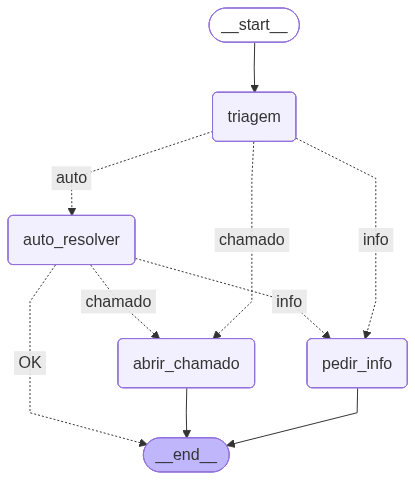

In [ ]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()

display(Image(graph_bytes))

In [ ]:
perguntas

['Quais são os principais direitos do titular do cartão?',
 'Em quanto tempo o cliente pode contestar uma despesa na fatura?',
 'O que devo fazer se perder meu cartão ou se ele for roubado?',
 'O que acontece se eu não pagar a fatura no vencimento?',
 'O que é o “Parcelado Fácil” e quais são as condições para utilizá-lo?',
 'Podem ser cobradas outras tarifas além da anuidade?',
 'Quero mudar a senha do meu cartão.',
 'Roubaram meu cartão, preciso de um atendente para ajudar a bloquear.']

In [ ]:
for msg in perguntas:
  resposta_final = grafo.invoke({"mensagem":msg})

  triag = resposta_final.get("triagem",{})
  print(f"PERGUNTA: {msg}\n")
  print(f"Decisao: {triag.get('decisao')}, Urgencia: {triag.get('urgencia')}, Ação final: {resposta_final.get('acao_final')}\n")
  print(f"RESPOSTA: {resposta_final.get('resposta')}")
  if resposta_final.get("citacoes"):
    print("CITAÇÕES:")
    for citacao in resposta_final.get("citacoes"):
      print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
      print(f"   Trecho: {citacao['trecho']}")

  print("------------------------------------")

Executando nó de triagem...
Decidindo ação no nó principal, após triagem...
Executando nó de auto resolução...
Decidindo ação após o auto-resolver...
RAG com sucesso, finalizando o fluxo.
PERGUNTA: Quais são os principais direitos do titular do cartão?

Decisao: AUTO_RESOLVER, Urgencia: BAIXA, Ação final: AUTO_RESOLVER

RESPOSTA: Seus principais direitos são:

*   Efetuar compras parceladas pelo Emissor com juros, caso disponível esse parcelamento à época.
*   Efetuar compras parceladas pelo estabelecimento comercial, sem juros, se disponível à época da compra pelo estabelecimento comercial.
*   Utilizar a Central de Atendimento ao Cliente para acesso a informações, solicitação de alguns serviços e esclarecimentos de dúvidas.
*   Encerrar a sua relação contratual imotivadamente, a qualquer tempo.
*   Ser reembolsado da Tarifa de Anuidade - Cartão Básico (relativa ao Cartão Básico) ou da Tarifa de Anuidade Diferenciada (relativa ao Cartão Diferenciado) do Cartão cancelado de forma propo